In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#Load data
df = pd.read_csv('tweets_dataset_ex2_2.csv', index_col='id', dtype={'id':str})

# Part One: Analysis, and Pre-processing

In [4]:
df[df.is_retweet == 'True'].text.tolist()[:20]

['Hillary Clinton proposes plan to address mental health treatment https://t.co/C7BLynIroF https://t.co/CWhvxE6Cxm',
 'Joe and Hillary went home to Scranton. Take a behind-the-scenes look at their visit: https://t.co/xdiqa0dbdP',
 'Mi México, and the world, lost a great singer, songwriter and human being. #RIP #JuanGabriel. #DivoDeJuarez https://t.co/EkZ7eduRfA',
 "Back when she was New York's senator, @HillaryClinton fought political attacks on access to emergency contraception: https://t.co/YEhvJjyQBP",
 '53 years ago today, we Marched on Washington for Jobs and Freedom. #GoodTrouble https://t.co/KO3YzpjuZG',
 'Poll: @realDonaldTrump vs. @HillaryClinton among white Evangelicals. https://t.co/6ohwIh1Q24',
 "Hate is not welcome in our homes. We shouldn't welcome it into the White House. #StrongerTogether https://t.co/B3sK5KpiQ4",
 "A must read today: The NYT digs deep into Donald Trump and his father's history of denying housing to blacks. https://t.co/c5GxvRQkQJ",
 'If Trump doesn’t s

As we can see most of the texts which marked as 'is_retweet' are written in third person. Therefore, we can use this as additional class in order to train the model for three classes: Trump, Hillary or fake.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1998 entries, 7.7041469386965e+17 to 7.49721116911034e+17
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1998 non-null   int64  
 1   handle                   1998 non-null   object 
 2   text                     1998 non-null   object 
 3   is_retweet               1998 non-null   object 
 4   original_author          304 non-null    object 
 5   time                     1980 non-null   object 
 6   in_reply_to_screen_name  49 non-null     object 
 7   in_reply_to_status_id    25 non-null     object 
 8   in_reply_to_user_id      24 non-null     float64
 9   is_quote_status          1973 non-null   object 
 10  lang                     1996 non-null   object 
 11  retweet_count            1998 non-null   object 
 12  favorite_count           1998 non-null   object 
 13  longitude                29 non-null     f

We can see that there are many columns with missing data. (missing more then 50%)

In [6]:
#Lets remove columns with large number of missing and not 'informative' data.
df = df.drop(columns=['longitude', 'latitude', 'place_id','in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id',
       'place_full_name', 'place_name', 'place_type', 'place_country_code',
       'place_country', 'place_contained_within', 'place_attributes',
       'place_bounding_box','original_author','truncated','extended_entities'])

In [7]:
#Analyse columns
def analyze_column(col):
    print("Number of unique values {0}".format(col.nunique()))
    print("Unique values are: {0}".format(col.unique()))
    print("\n")
    
analyze_column(df.handle)
analyze_column(df.lang)
analyze_column(df.source_url)

Number of unique values 2
Unique values are: ['realDonaldTrump' 'HillaryClinton']


Number of unique values 4
Unique values are: ['en' 'und' nan 'False' 'es']


Number of unique values 7
Unique values are: ['http://twitter.com/download/iphone' 'http://twitter.com'
 'https://about.twitter.com/products/tweetdeck'
 'http://twitter.com/#!/download/ipad' nan
 'http://twitter.com/download/android'
 "BoundingBox(type='Polygon', coordinates=[[[-105.109815, 39.614151], [-104.734372, 39.614151], [-104.734372, 39.812975], [-105.109815, 39.812975]]], _api=<tweepy.api.API object at 0x7f013ae30588>)"
 "BoundingBox(type='Polygon', coordinates=[[[-104.910562, 38.741142], [-104.668092, 38.741142], [-104.668092, 39.035895], [-104.910562, 39.035895]]], _api=<tweepy.api.API object at 0x7f013ae30588>)"]




As we can see there are there are: 2 Users (as expected); 7 different languages which features can  mislead us; 10 different sources used

In [8]:
#remove all non english rows
df = df[df.lang=='en']

#Get the length of the tweets
df['text_len'] = df.text.apply(len)

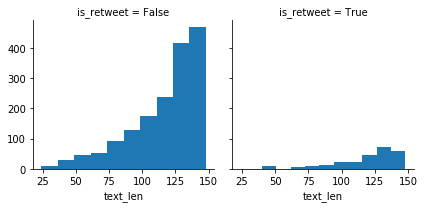

In [9]:
#plot the histogram of the text length
grid = sns.FacetGrid(df,col='is_retweet')
grid.map(plt.hist,'text_len')

As we can see the length of the retweeted tweets is shorter.

In [10]:
#Set handle field all rows with 'is_retweet' 
df.handle[df.is_retweet == 'True'] = 'fake'

/home/slavik/anaconda3/envs/tf2/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


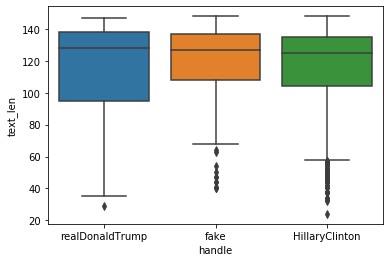

In [11]:
sns.boxplot(x='handle',y='text_len',data=df)

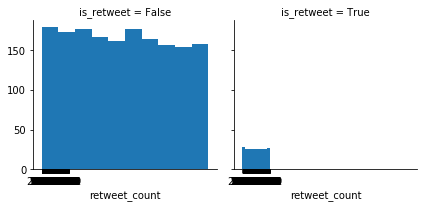

In [12]:
#plot the histogram of the text length
grid = sns.FacetGrid(df,col='is_retweet')
grid.map(plt.hist,'retweet_count')

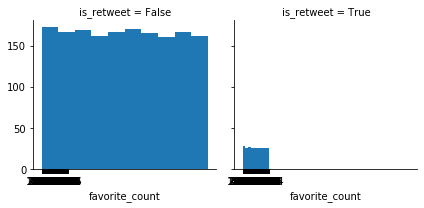

In [13]:
#plot the histogram of the text length
grid = sns.FacetGrid(df,col='is_retweet')
grid.map(plt.hist,'favorite_count')

as we can see the number of 'favorite_count' and 'retweet_count' at tweets are larger then in retweets.

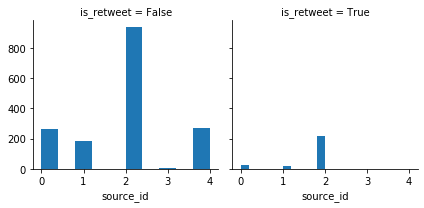

In [14]:
id_lst = range(0, df.source_url.nunique())
df_tmp = pd.DataFrame({'source_url': df.source_url.unique(), 'source_id' : id_lst})
df_final = pd.merge(df, df_tmp, how='left', on=['source_url'])
# del df, df_tmp

#plot the histogram of the text length
grid = sns.FacetGrid(df_final,col='is_retweet')
grid.map(plt.hist,'source_id')

In [15]:
df_tmp

,source_url,source_id
0,http://twitter.com/download/iphone,0
1,http://twitter.com,1
2,https://about.twitter.com/products/tweetdeck,2
3,http://twitter.com/#!/download/ipad,3
4,http://twitter.com/download/android,4


The 'source url' field show us that there are defferent sources of tweets. (iphone, ipad, android, api, mobile) 

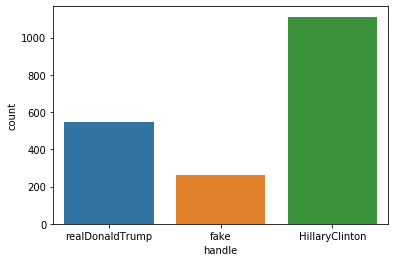

In [16]:
#number of tweets by 'handle'
sns.countplot(x="handle", data=df)

The data isn't very balanced, but accuracy paradox shouldn't be an issue, but at any case we rely more on f1 score, precision and recall. 

# Models

In [17]:
import numpy as np
import xgboost

import scikitplot as skplt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report

import tensorflow as tf
import tensorflow_hub as hub

In [18]:
#Recieve real and predicted data, returm all classification metrics 
def get_report(real_data, predicted):
    conf_mat = confusion_matrix(real_data, predicted)
    class_report = classification_report(real_data, predicted)
    accuracy = accuracy_score(y_test, predictions)
    
    return conf_mat, class_report, accuracy

In [23]:
#Draw confusion matrix
def plot_confusion(real_data, predicted):
    skplt.metrics.plot_confusion_matrix(y_test, predicted, normalize=True)
    plt.show()

#Plot precision recall curve
def plot_precision_recall(real_data, predicted):
    x = np.column_stack((1-predicted, predicted))
    skplt.metrics.plot_precision_recall_curve(y_test, x)
    plt.show()
    
#Plot ROC curve
def plot_roc(real_data, predicted):
    x = np.column_stack((1-predicted, predicted))
    skplt.metrics.plot_roc_curve(y_test, x)
    plt.show()

In [20]:
from sklearn import preprocessing

In [21]:
le = preprocessing.LabelEncoder()
le.fit(df.handle)
target = le.transform(df.handle)

In [22]:
col_names = ['retweet_count', 'favorite_count', 'text_len', 'source_id']
col_to_scal = ['retweet_count', 'favorite_count', 'text_len']

def process_features(data):
    features = df_final[col_names]
    ct = ColumnTransformer([('exOne', MinMaxScaler(), col_to_scal)], remainder='passthrough')
    
    return ct.fit_transform(features)



module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #"https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model_uge = hub.load(module_url)
print ("module %s loaded" % module_url)

def embed(input):
    return model_uge(input)

def get_textual_feat(data):
    txt_lst = data.text.tolist()
    embed_lst = embed(txt_lst)
    embed_data = np.array(embed_lst)
    scaler = MinMaxScaler()
    scaler.fit(embed_data)
    
    return scaler.transform(embed_data[::1])

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


# Lets begin without textual features:

In [24]:
in_data = process_features(df_final)
# target = np.array(df_final.hand_id.tolist())

X_train, X_test, y_train, y_test = train_test_split(in_data, target,test_size=0.2,random_state=101)

The best model for that task is xgboost, since it an ensamble method it uses many trees with the same data.
In our case, we have small dataset.

In [25]:
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [26]:
conf_mat, class_report, accuracy = get_report(y_test, predictions)

print("Accuracy: %.2f%% \n" % (accuracy * 100.0))
print('confusion matrix\n')
print(conf_mat)
print(class_report)

Accuracy: 84.90% 

confusion matrix

[[202  11   4]
 [ 39  18   0]
 [  3   1 106]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       217
           1       0.60      0.32      0.41        57
           2       0.96      0.96      0.96       110

    accuracy                           0.85       384
   macro avg       0.80      0.74      0.75       384
weighted avg       0.83      0.85      0.83       384



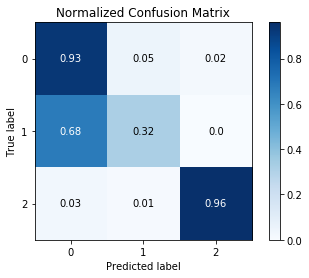

In [27]:
plot_confusion(y_test, predictions)

# Now lets use only Textual features

In [31]:
tin_data = get_textual_feat(df_final)
X_train, X_test, y_train, y_test = train_test_split(tin_data, target,test_size=0.2,random_state=101)

In [32]:
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [33]:
conf_mat, class_report, accuracy = get_report(y_test, predictions)

print("Accuracy: %.2f%% \n" % (accuracy * 100.0))
print('confusion matrix\n')
print(conf_mat)
print(class_report)

Accuracy: 73.18% 

confusion matrix

[[204   0  13]
 [ 51   1   5]
 [ 34   0  76]]
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       217
           1       1.00      0.02      0.03        57
           2       0.81      0.69      0.75       110

    accuracy                           0.73       384
   macro avg       0.84      0.55      0.53       384
weighted avg       0.78      0.73      0.67       384



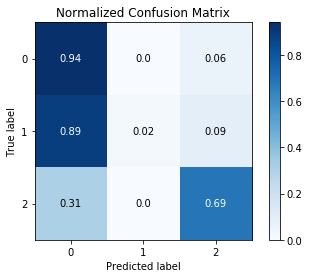

In [34]:
plot_confusion(y_test, predictions)

# All features 

In [35]:
all_data = np.concatenate((in_data, tin_data), axis=1)
X_train, X_test, y_train, y_test = train_test_split(all_data, target,test_size=0.2,random_state=101)

In [36]:
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [37]:
conf_mat, class_report, accuracy = get_report(y_test, predictions)

print("Accuracy: %.2f%% \n" % (accuracy * 100.0))
print('confusion matrix\n')
print(conf_mat)
print(class_report)

Accuracy: 85.42% 

confusion matrix

[[205   9   3]
 [ 42  15   0]
 [  2   0 108]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       217
           1       0.62      0.26      0.37        57
           2       0.97      0.98      0.98       110

    accuracy                           0.85       384
   macro avg       0.81      0.73      0.74       384
weighted avg       0.84      0.85      0.83       384



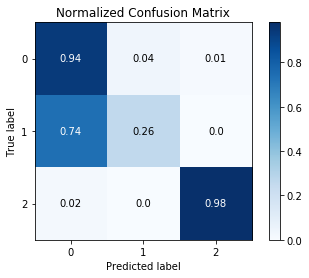

In [38]:
plot_confusion(y_test, predictions)

# Winning model with 85.42%% accuracy!!!